In [1]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import matplotlib.tri as tri

### Determinants and Recursion


Write a function that computes the determinant of a matrix using recursion. Think about how each step of the determinant computation computes new determinants from smaller matrices. Also think about what should be the terminal case for the recursion.

Then write another function that determines whether a matrix is invertible using your determinant function.

In [2]:
def det(A):
  #################### TODO: YOUR CODE HERE ####################################
  if A.shape == (1, 1):
    return A[0, 0]
  if A.shape == (2, 2):
    return A[0, 0] * A[1, 1] - A[0, 1] * A[1, 0]
  determinant = 0
  for col in range(A.shape[1]):
    minor = np.delete(np.delete(A, 0, axis=0), col, axis=1)
    determinant += ((-1) ** col) * A[0, col] * det(minor)
  return determinant
  ##############################################################################

def is_invertible(A):
  #################### TODO: YOUR CODE HERE ####################################
  determinant = det(A)

  return not np.isclose(determinant, 0)
  ##############################################################################

In [3]:
A = np.array([[1,2,2], [3,1,3], [1,3,1]], dtype = np.float64)
print(f"Numpy function: {np.linalg.det(A)}")
print(f"Our function: {det(A)}")
print(f"Is invertible: {is_invertible(A)}")

Numpy function: 8.000000000000002
Our function: 8.0
Is invertible: True


In [4]:
B = np.array([[1,2,2], [2,4,4], [1,3,1]], dtype = np.float64)
print(f"Numpy function: {np.linalg.det(B)}")
print(f"Our function: {det(B)}")
print(f"Is invertible: {is_invertible(B)}")

Numpy function: 0.0
Our function: 0.0
Is invertible: False


In [5]:
C = np.array([[3,0,0,2], [0,0,3,0], [0,0,2,2], [3,1,0,0]], dtype = np.float64)
print(f"Numpy function: {np.linalg.det(C)}")
print(f"Our function: {det(C)}")
print(f"Is invertible: {is_invertible(C)}")

Numpy function: 18.000000000000004
Our function: 18.0
Is invertible: True


### Cross Products and Surface Area

We will learn how to compute the surface area of a 3D shape made of triangles, which describes essentially all shapes you will see in computer graphics in practice.

In graphics, shapes are composed of vertices, edges, and faces. The vertices are the points that tell you where the shape is, the edges connect the points, and the faces are what we see when the image is rendered. The faces are just triangular faces that connect three vertices.

Below is an example where you will create a function that computes the surface area of a single face, then use that to compute the surface area of a complex object that is composed of many faces.

In [6]:
# area of a triangular face using the norm of the cross product
def face_area(u,v,w):
  #################### TODO: YOUR CODE HERE ####################################
  # compute the area of a triangular face with vertices given by the vectors u,v,w
  # use the norm and the cross product following the example in class
  # Hint: use np.cross to compute the cross product
  edge1 = v - u
  edge2 = w - u

  cross_prod = np.cross(edge1, edge2)
  area = 0.5 * norm(cross_prod)

  return area

  ##############################################################################

# area of a surface given by a collection of triangular faces
def surface_area(A, print_flag = True):
  # A is a nx3x3 array where n is the number of faces
  # and A[i,:,:] contains a 3x3 matrix of the three vertices for face i
  area = 0 # surface area of figure A
  for i in range(A.shape[0]):
    #################### TODO: YOUR CODE HERE ##################################
    # add the area of face i to the overal area of the object

    u, v, w = A[i, 0], A[i, 1], A[i, 2]
    area += face_area(u, v, w)


    #########################################################################
    if (print_flag):
      print(f"area of face {i+1} is {face_area(A[i,0], A[i,1], A[i,2])}")
  return area


In [7]:
# define the 3D figure

# vertices
u = np.array([-2,3,2])
v = np.array([-2,5,2])
w = np.array([-3,4,2])
t = np.array([-2,4,4])

# faces
A = np.array([[u,v,t], [v,w,t], [u,w,t], [u,v,w]])

surface_area(A)

area of face 1 is 2.0
area of face 2 is 1.5
area of face 3 is 1.5
area of face 4 is 1.0


6.0

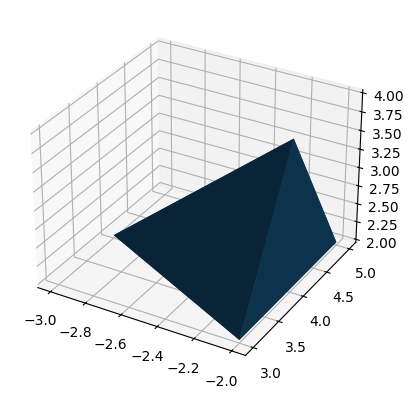

In [8]:
##### visualize the surface #####

vertices = np.array([u,v,w,t])
# x,y,z coordinates of all vertices
x = vertices[:,0]
y = vertices[:,1]
z = vertices[:,2]

# create triangle faces
faces = tri.Triangulation(x,y, [[0,1,3],[1,2,3],[0,2,3], [0,1,2]])
fig, ax = plt.subplots(subplot_kw =dict(projection="3d"))
ax.plot_trisurf(faces, z)
plt.show()